|column|definition|
|---|---|
|**date**|Date in format DD/MM/YYYY|
|**tmax**|Maximum temperature of the day in °F|
|**tmin**|Minimum temperature of the day in °F|
|**tavg**|Average temperature of the day in °F|
|**departure**|Departure from normal temperature in °F|
|**HDD**|Heating Degree Days|
|**CDD**|Cooling Degree Days|
|**precipitation**|Precipitation in inches|
|**new_snow**|New snowfall in inches|
|**snow_depth**|Snowfall depth in inches.|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [40]:
df = pd.read_csv("nyc_temperature.csv")

# change the dates to a Timestamp
df["date"] = df["date"].apply(pd.to_datetime)
print(type(df["date"][0]))
#df.loc[df["precipitation"] == "T"]
df.head(13)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,date,tmax,tmin,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
0,2019-01-01,60,40,50.0,13.9,15,0,0.08,0,0
1,2019-02-01,41,35,38.0,2.1,27,0,0,0,0
2,2019-03-01,45,39,42.0,6.3,23,0,T,0,0
3,2019-04-01,47,37,42.0,6.5,23,0,0,0,0
4,2019-05-01,47,42,44.5,9.1,20,0,0.45,0,0
5,2019-06-01,49,32,40.5,5.3,24,0,T,0,0
6,2019-07-01,35,26,30.5,-4.5,34,0,0,0,0
7,2019-08-01,47,35,41.0,6.1,24,0,0.21,0,0
8,2019-09-01,46,35,40.5,5.8,24,0,0.07,0,0
9,2019-10-01,35,30,32.5,-2.1,32,0,0,0,0


In [41]:
# We clean out the T values in the last three columns

df["precipitation"] = df["precipitation"].replace({"T": 0})
df["new_snow"] = df["new_snow"].replace({"T": 0})
df["snow_depth"] = df["snow_depth"].replace({"T": 0})

In [33]:
# just making sure we don't have any T's left -> we don't!

# df.loc[df["precipitaion"] == "T"]
# df.loc[df["new_snow"] == "T"]
# df.loc[df["snow_depth"] == "T"]

In [90]:
# checking the type of data in the last three columns.. we want them to be floats

print(type(df["snow_depth"][0]))

<class 'numpy.float64'>


In [43]:
# We transform these columns' data to type float

df["precipitation"] = df["precipitation"].apply(float)
df["new_snow"] = df["new_snow"].apply(float)
df["snow_depth"] = df["snow_depth"].apply(float)

In [88]:
# DISREGARD this code chunk.. I was just playing around and didn't find this insightful at all

# df.plot(x="date", y="tavg", kind="scatter")
# df.plot(x="date", y="tavg", kind="line")
# df.plot(x="date", y="tavg")

In [89]:
# DISREGARD this code chunk.. I was just playing around and didn't find this insightful at all

# model = LinearRegression()
# model.fit(np.matrix(df.index).reshape(-1,1), df["tavg"])
# b = model.intercept_
# m = model.coef_[0]

# plt.plot(df.index, df["tavg"])
# plt.plot(df.index, m * df.index + b)

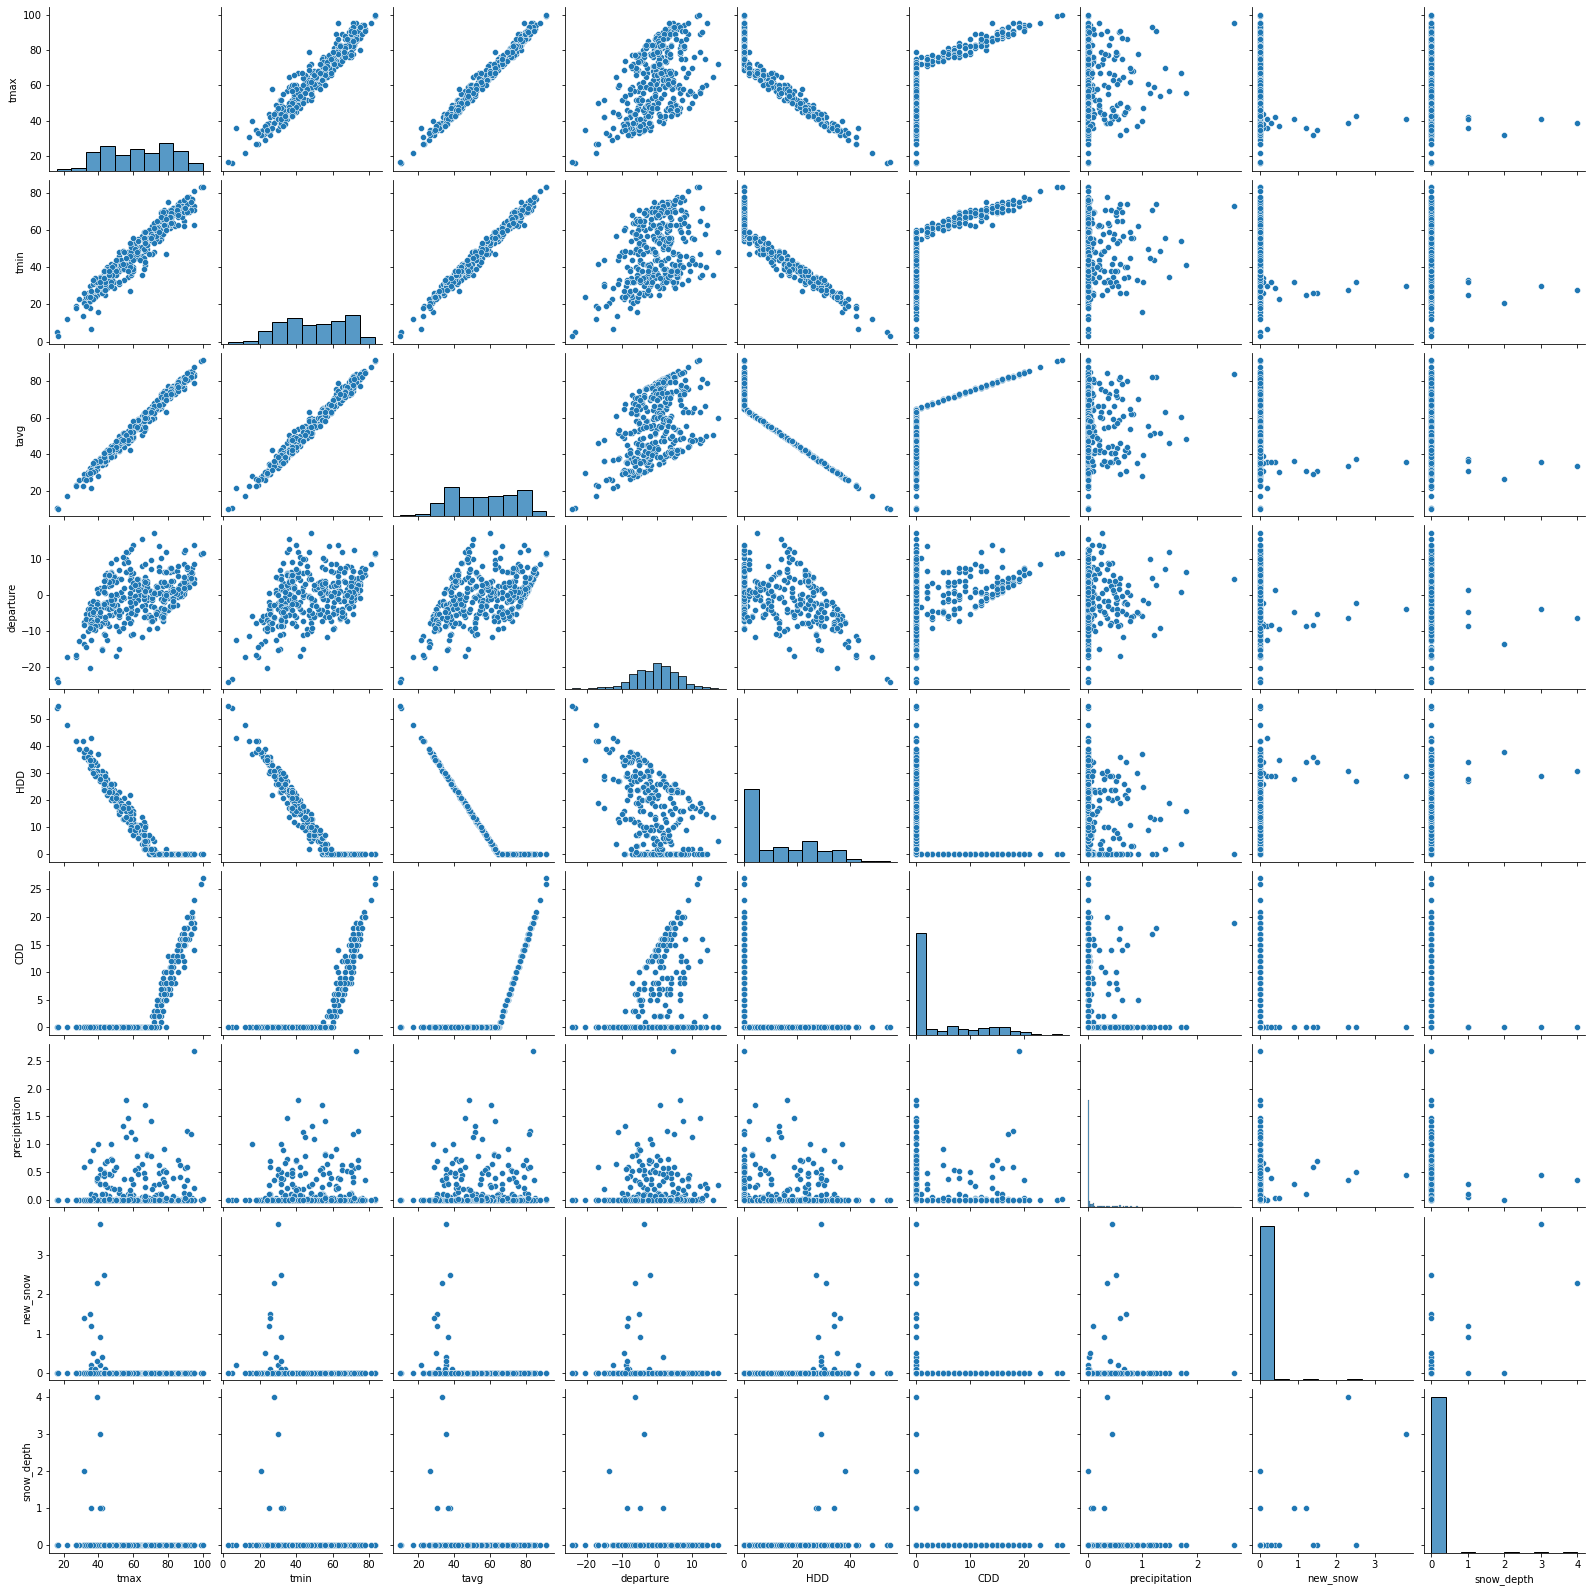

In [56]:
sns.pairplot(df)

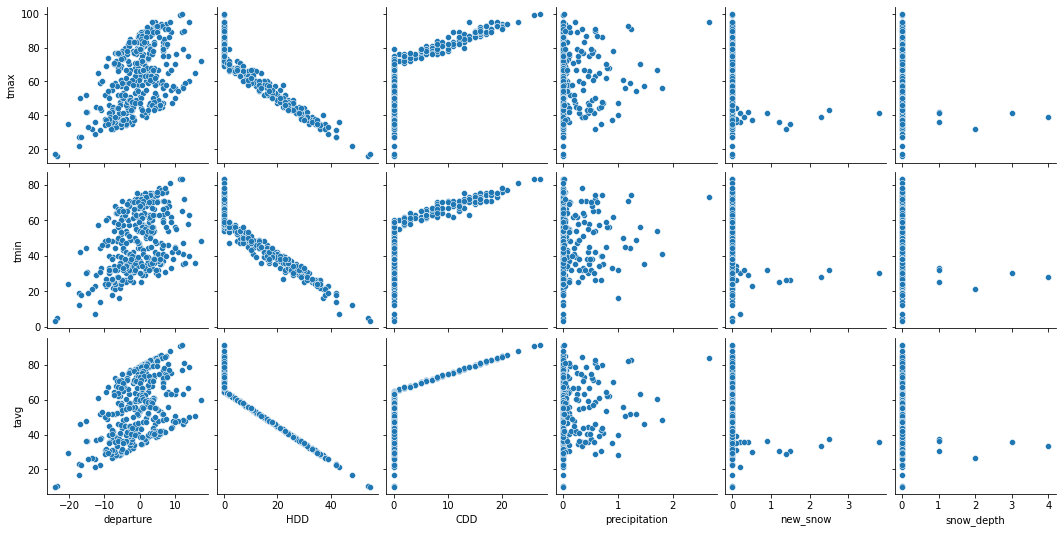

In [59]:
x_vars = ["departure", "HDD", "CDD", "precipitation", "new_snow", "snow_depth"]
y_vars = ["tmax", "tmin", "tavg"]

sns.pairplot(df, x_vars=x_vars, y_vars=y_vars)

In [86]:
# df.corr()

# `Analying the correlation`<br>
It seems like `departure` and `HDD` and `CDD`  
are correlated with `tavg` but not the other columns  
Thus we'll use them in our regression model  
We will do a multicolliniarity test on them first though to make sure  
they're not collinear or multicollinear

In [78]:
df[["tavg","departure","HDD","CDD","precipitation","new_snow","snow_depth"]].corr(method="spearman")

,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
tavg,1.000000,0.452970,-0.972550,0.862062,-0.005781,-0.280274,-0.174390
departure,0.452970,1.000000,-0.408569,0.329066,0.018561,-0.214192,-0.115156
HDD,-0.972550,-0.408569,1.000000,-0.811016,-0.002108,0.287204,0.177737
CDD,0.862062,0.329066,-0.811016,1.000000,-0.095660,-0.151531,-0.094651
precipitation,-0.005781,0.018561,-0.002108,-0.095660,1.000000,0.221373,0.117494
new_snow,-0.280274,-0.214192,0.287204,-0.151531,0.221373,1.000000,0.416836
snow_depth,-0.174390,-0.115156,0.177737,-0.094651,0.117494,0.416836,1.000000


In [76]:
df[["tavg","departure","HDD","CDD","precipitation","new_snow","snow_depth"]].corr()

,tavg,departure,HDD,CDD,precipitation,new_snow,snow_depth
tavg,1.000000,0.474830,-0.958306,0.803954,0.011681,-0.180886,-0.145484
departure,0.474830,1.000000,-0.477517,0.332172,0.033311,-0.104159,-0.100274
HDD,-0.958306,-0.477517,1.000000,-0.600872,-0.025594,0.197466,0.159156
CDD,0.803954,0.332172,-0.600872,1.000000,-0.020160,-0.091041,-0.071355
precipitation,0.011681,0.033311,-0.025594,-0.020160,1.000000,0.121013,0.044353
new_snow,-0.180886,-0.104159,0.197466,-0.091041,0.121013,1.000000,0.693532
snow_depth,-0.145484,-0.100274,0.159156,-0.071355,0.044353,0.693532,1.000000


In [79]:
# calculate_vif was taken from
#https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [85]:
tavg_df = df[["tavg","departure","HDD","CDD","precipitation","new_snow","snow_depth"]]

calculate_vif(tavg_df, features=["departure","HDD","CDD","precipitation","new_snow","snow_depth"])

,VIF,Tolerance
departure,1.303049,0.767431
HDD,1.866239,0.535837
CDD,1.577879,0.633762
precipitation,1.023686,0.976862
new_snow,1.991332,0.502176
snow_depth,1.935717,0.516604


#### Since the `variance inflation factor` isn't particularly high among the columns, we will not ommit any of these variables from the model.